In [399]:
import matplotlib
import os
import numpy
import json
import collections
from matplotlib.pyplot import cm
import numpy as np

In [432]:
# Below are the filenames to grab data from
bases = [
# "./Results_Weak_V29_DIM_3_BASE_16_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_64_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_DIM_3_BASE_16_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V29_SolDB3d_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_16_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_64_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_8_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V29_system_petsc_high_mem_DIM_3_BASE_16_ORDER_2_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Gadi/",
# "./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolH_Magnus/",
# "./Results_Weak_V210_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolH_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-7_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-8_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V210_retest_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
# "./Results_Weak_V290_retest_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",

#     "Results_Weak_Weak_Scaling_Init_Test_DIM_3_BASE_16_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Weak_Weak_Scaling_Init_Test_DIM_3_BASE_24_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Weak_Weak_Scaling_Init_Test_DIM_3_BASE_32_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Weak_Weak_Scaling_Init_Test_DIM_3_BASE_48_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Weak_For_Blog_DIM_3_BASE_16_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
#     "Results_Weak_For_Blog_DIM_3_BASE_24_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
#     "Results_Weak_For_Blog_DIM_3_BASE_32_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
#     "Results_Weak_For_Blog_DIM_3_BASE_48_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
    
#     "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_256_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
#     "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_320_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi/",
    "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
    "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
    "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_256_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
    "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_320_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
    "Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_512_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/",
]

In [433]:
title = "Strong Scaling Magnus"

# If the following is true, the graph datasets are coloured 
# by routine name (for example, Stokes.solve()) . Otherwise, it's done by
# set name (for example, "Magnus 16^3 Order 1" )
graph_by_routine = False

# if graphing strong scaling, graphing service units is possibly more useful
service_units_y_axis = False

# if true, we generate speedup graphs. note that for speedup graphs, 
# the first (lowest proc count) item is used as base by which higher
# proc count items can be compared.
graph_speedup = True
if graph_speedup and service_units_y_axis:
    raise ValueError("Speedup graph needs to use raw time, not service units.")

if not graph_by_routine:
    # titles for the graph legend
#     graph_config = [
#     ("Gadi   16^3",  "green", "-",16),
#     ("Gadi   24^3",   "blue", "-",24),
#     ("Gadi   32^3",    "red", "-",32),
#     ("Gadi   48^3", "purple", "-",48),
#     ("Magnus 16^3",  "green", "--",16),
#     ("Magnus 24^3",   "blue", "--",24),
#     ("Magnus 32^3",    "red", "--",32),
#     ("Magnus 48^3", "purple", "--",48),
#     ]
    graph_config = [
#     ("Gadi    64^3",  "green", "-",64),
#     ("Gadi   128^3",   "blue", "-",128),
#     ("Gadi   256^3",    "red", "-",256),
#     ("Gadi   320^3", "purple", "-",320),
    ("Magnus  64^3",  "green", "--",64),
    ("Magnus 128^3",   "blue", "--",128),
    ("Magnus 256^3",    "red", "--",256),
    ("Magnus 320^3", "purple", "--",320),
    ("Magnus 512^3", "yellow", "--",512),
    ]
    keys       = [data[0] for data in graph_config]
    cols       = [data[1] for data in graph_config]
    linestyles = [data[2] for data in graph_config]
    basesizes  = [data[3] for data in graph_config]
else:
    linestyles = ['-','--',':','-','--',':','-','--',':']

linewidths = [1.,1.0,1.0,1.,1.0,1.0,1.,1.0,1.0]

# the following can limit the range of proc counts viewed
maxproc = 9999999
minproc = 0

# if true, use listed functions below, otherwise auto find slowest funcs
funcs_explicit = True
funcs_auto_how_many = 20
if funcs_explicit:
#     funcs = [
#      'FeMesh.load()',
#      'FeMesh.save()',
#      'MeshVariable.load()',
#      'MeshVariable.save()',
#      'Swarm.load()',
#      'Swarm.save()',
#      'SwarmVariable.load()',
#      'SwarmVariable.save()',
#      'Figure.save()',
#      'StokesSolver.solve()',
#     ]

    funcs = ['Total_Runtime',
     'StokesSolver.solve()',
     'Python_Import_Time',
     'Stokes.__init__()',
#      'AdvectionDiffusion.__init__()',
#      'FeMesh_Cartesian.__init__()',
#      'MPI_Launch_Time',
     'AdvectionDiffusion.integrate()',
     'SwarmAdvector.integrate()',
#      'Swarm.__init__()',
     'Integral.evaluate()']
    
    funcs = [ 'Total_Runtime', ]

ignore_funcs = [
#     'Container_Launch_Time',
]

In [434]:
!find . -name Results_\* -type d

./Results_Weak_V29_SolDB3d_DIM_3_BASE_16_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi
./Results_Weak_V29_SolDB3d_gadi_petsc_take2_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_1_MODEL_SolDB3d_Gadi
./Results_Weak_V29_SolDB3d_DIM_3_BASE_8_ORDER_2_TOL_1e-11_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi
./Results_Weak_UW3_FIRST_DIM_3_BASE_16_ORDER_1_MAXITS_400_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_32_ORDER_1_TOL_1e-8_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_uw211_testing_fixvel_DIM_3_BASE_32_ORDER_1_MAXITS_1_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Gadi
./Results_Weak_V210_noadvdiffnoswarmadv_DIM_3_BASE_16_ORDER_2_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V210_noadvdiff_DIM_3_BASE_32_ORDER_1_TOL_1e-6_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus
./Results_Weak_V29_SolDB3d_DIM_3_BASE_16_ORDER

In [435]:
# Each simulation stores it's timing data in a different file. 
# Here we grab all required files.
# Note wildcards, glob.glob() etc. 
nrpoc_set = set()
import glob
nprocmax = 0
done = False
def grab_files(base):
    global nprocmax
    global maxconfig
    global done
    jsonguy = collections.defaultdict(lambda: [])
    for filename in glob.glob(base+"*.json"):
        with open(filename, 'r') as f:
            data = json.load(f)
            splitbase = filename.split(base)
            splitfile = splitbase[1].split("_")
            res = int(splitfile[1])
            nproc = int(splitfile[3])
            if nproc < minproc:
                continue
            if nproc > maxproc:
                continue
            nrpoc_set.add(nproc)
            print(filename)
#             print("VRMS = {}".format(data[u'Other_data']["vrms"]))
#             print("Res = {}".format(res))
#             print("nproc = {}".format(nproc))
            jsonguy[(res,nproc)].append(data)
            if nproc>nprocmax and not done:
                nprocmax = nproc
                maxconfig = (res,nproc)
    done = True
    return jsonguy
jsons = []
for baseguy in bases: 
    jsons.append(grab_files(baseguy))

Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_64_Nproc_8_JobID_6917488.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_64_Nproc_27_JobID_6917489.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_64_Nproc_64_JobID_6917490.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_64_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_64_Nproc_1_JobID_6917487.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_128_Nproc_27_JobID_6917492.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TOL_1e-9_PENALTY_-1._IO_0_MODEL_SolDB3d_Magnus/Res_128_Nproc_8_JobID_6917491.json
Results_Strong_Strong_Scaling_Init_Test_DIM_3_BASE_128_ORDER_1_MAXITS_50_TO

In [436]:
# Lets add in other_timing data
# This is data not recorded by `uw.timing` module, and is explicitly 
# recorded into the outputted json file.  This is used for Python load time
# and container start time. 
for jsonguy in jsons:
    for key,listjsons in jsonguy.items():
        for guy in listjsons:
            othertiming =  guy[u'Other_timing']
            for otherk, otherv in othertiming.items():
                othertiming[otherk] = [1, otherv]
            guy.update(othertiming)

In [437]:
if not funcs_explicit:
    guy32 = jsons[0][maxconfig][0]
    list32 = []
    for key,val in guy32.items():
        if isinstance(val,list):
            list32.append([key,val[1]/float(val[0])])
    sortedlist = sorted(list32, key=lambda x: x[1], reverse=True) 
    funcs = []
    totmax = funcs_auto_how_many
    tot = 0
    for guy in sortedlist:
        tot+=1
        if tot > totmax:
            break
        if guy[0] in ignore_funcs:
            continue
        funcs.append(guy[0])
funcs

['Total_Runtime']

In [438]:
# Collect data from jsons
def collect_data_from_jsons(jsonguy):
    funcdat = collections.defaultdict(lambda: [])
    for key,data in jsonguy.items():                      # all dicts
        for func in funcs:                                # funcs we want to look at
            for datum in data:                            # all runs for each res/nproc combo
                if func in datum:
                    datguy = datum[func]
                    dat = (key[0],key[1],datguy[1]/float(datguy[0]))
                    funcdat[func].append(dat)
                else:
                    print("{} not found in {}. Skipping".format(func,key))
                    continue
    return funcdat
funcdats = []
for jsonguy in jsons:
    result = collect_data_from_jsons(jsonguy)
    if result:
        funcdats.append(result)

In [439]:
# get averages if multiple datasets for given nproc/res
def get_averages(funcdatguy):
    avfuncdat = collections.defaultdict(lambda: [])
    for key, value in funcdatguy.items():
        counts = collections.defaultdict(lambda: [0,0.])
        for entry in value:
            dat = counts[entry[1]]
            dat[0]+=1
            dat[1]+=entry[2]
        for nproc, countdat in counts.items():
            avfuncdat[key].append((0,nproc,countdat[1]/float(countdat[0])))
    return avfuncdat
avfuncdats = []
for funcdat in funcdats:
    avfuncdats.append(get_averages(funcdat))

In [440]:
dats = avfuncdats

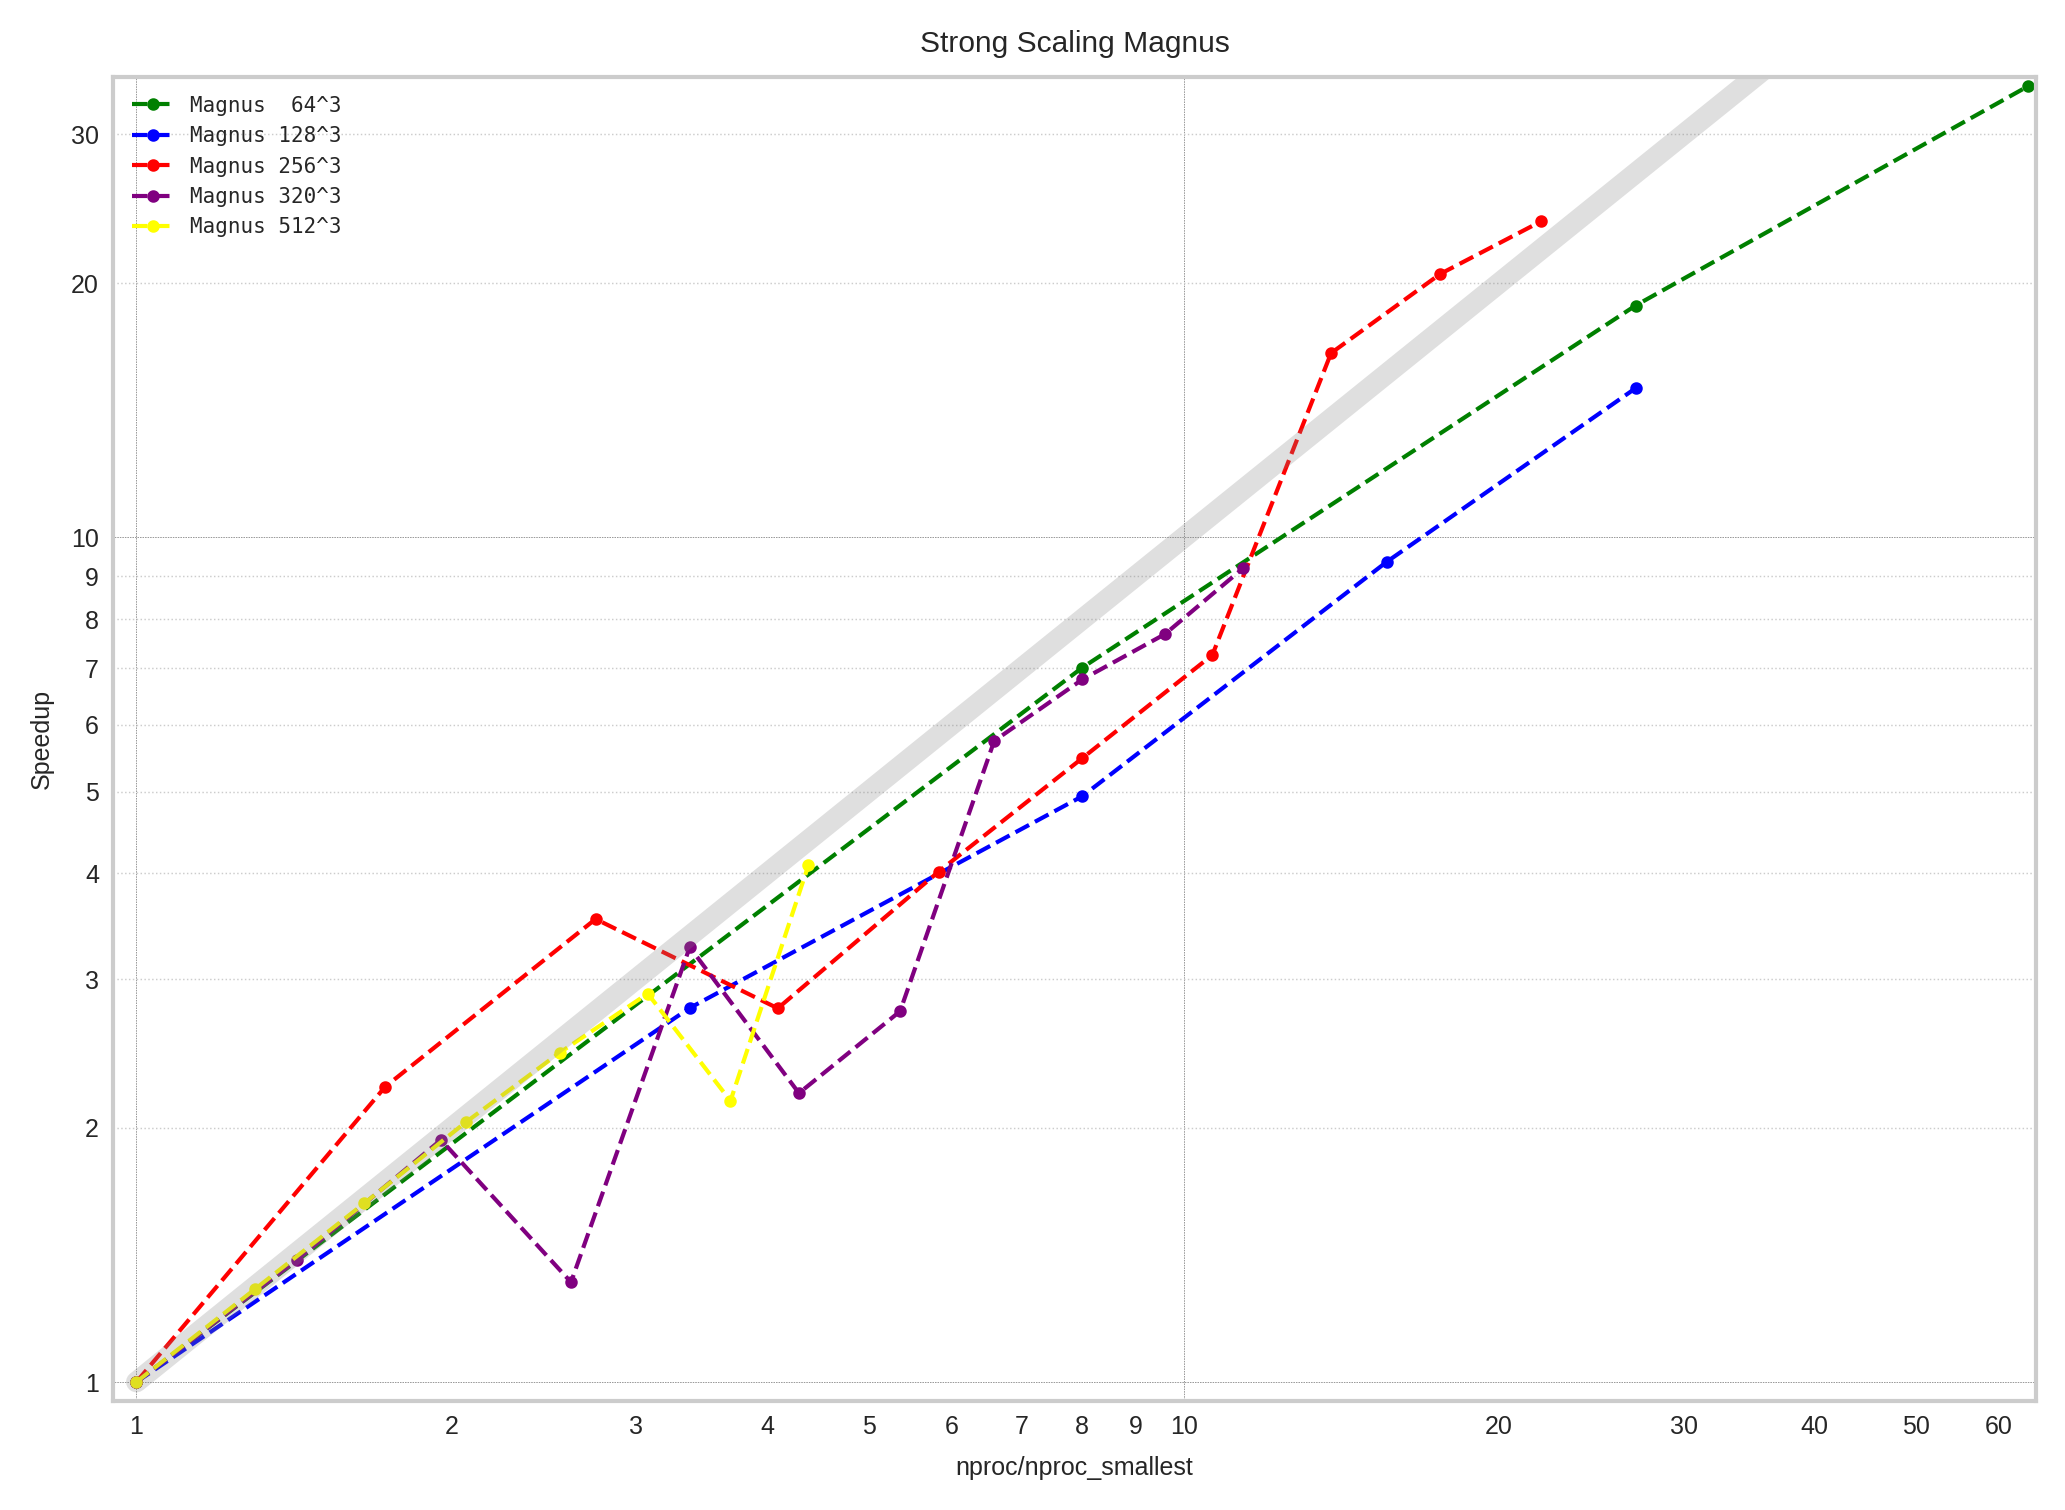

In [441]:
%matplotlib inline
# plot
import matplotlib.pyplot as plt
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 6}

matplotlib.rc('font', **font)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(dpi=300, figsize=(8.27, 11.69/2.))
ax = plt.subplot(1,1,1,xscale='log',yscale='log')
# ax.set_title("Save operations")
ax.set_xlabel("nproc")
if service_units_y_axis:
    ax.set_ylabel("Service Units (time(h)*nprocs)")
else:
    ax.set_ylabel("time(s)")
if graph_speedup:
    ax.set_xlabel("nproc/nproc_smallest")
    ax.set_ylabel("Speedup")

if not graph_speedup:
    sortedprocs = sorted(list(nrpoc_set))
    ax.xaxis.set_ticks(sortedprocs)
    ax.xaxis.set_ticklabels(sortedprocs, rotation=-70)

ax.grid(axis="y", which="both", linestyle=':', linewidth=0.35)
# ax.grid(axis="x", which="both", linestyle=':', linewidth=0.2)
ax.grid(b=True, which='major', color='black', linestyle=':',linewidth=0.15)

plt.title(title)

xvals = []
yvals = []
for index, dat in enumerate(dats):
    colind = 0
    for key, value in dat.items():
        xy = []
        for entry in value:
            xy.append((entry[1],entry[2]))
        sorteddat = sorted(xy, key=lambda x: x[0], reverse=False) 
        if graph_by_routine:
            cols = cm.Set3(np.linspace(0,1,len(funcs)))
            if key=='Total_Runtime':
                col = "black"
                lw  = 1.5
            else:
                col = cols[colind]
                lw = 0.5
            keyg = key
            if index!=0: keyg=None
        else:
            keyg = keys[index]
            col  = cols[index]

        # Generate x dataset
        xfact = 1.
        if graph_speedup:
            # scale by smallest proc count
            xfact = sorteddat[0][0]
        xdat = [x[0]/xfact for x in sorteddat]
        xvals += xdat

        # generate y dataset
        if service_units_y_axis:
            ydat = [x[1]*x[0]/(60*60) for x in sorteddat]
        else:
            ydat = [x[1] for x in sorteddat]
        if graph_speedup:
            # scale by first item to get speedup.
            ydat = [ydat[0]/yd for yd in ydat]
        yvals += ydat
    
        ax.plot(xdat, ydat, 
                label=keyg, 
                color=col, 
                linestyle=linestyles[index], 
                marker='o', 
                markersize=2,
                linewidth=linewidths[index])

        colind+=1

if graph_speedup:
    import matplotlib.ticker as mticker
    from matplotlib.ticker import FormatStrFormatter
    ax.xaxis.set_minor_formatter(mticker.ScalarFormatter(useOffset=False))
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.ScalarFormatter(useOffset=False))
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    xmin = 1
    xmax = round(np.array(xvals).max())+1
    ymin = 1
    ymax = round(np.array(yvals).max())+1
#     xvalrange = np.linspace(xmin,xmax,num=10,dtype=int)
#     ax.xaxis.set_ticks(xvalrange)
#     ax.xaxis.set_ticklabels(xvalrange, rotation=-70)
#     yvalrange = np.linspace(ymin,ymax,num=10,dtype=int)
#     ax.yaxis.set_ticks(yvalrange)
#     ax.yaxis.set_ticklabels(yvalrange)
    import matplotlib.pyplot as plt
    x, y = [1, xmax], [1, xmax]
    ax.plot(x, y, color="grey", lw=5, alpha=0.25)
    ax.set_xlim(xmin-0.05,xmax+0.1)
    ax.set_ylim(ymin-0.05,ymax+0.1)


ax.legend( prop={'family': 'monospace', 'size':5})

In [442]:
fig.savefig(title+".png")